<a href="https://colab.research.google.com/github/aag112/911calls/blob/master/Copy_of_911EmergencyCalls.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Case Study

Congrats! You have been contracted to conduct a brief analysis of a dataset containing ememrgency calls in order to determine the allocation of funds to you local authorities.  This analysis will play a role in deciding changes to the emergency response department.

The data is based in 911 emergency calls and your job is to determine a variety of issues regarding said calls.

1. Using Pandas and Numpy, analyse the data and come up with 5 questions that you would like to answer about the data.

2. the instructor will provide a rnage of questions to answer and you should use your knowledge to complte them as a team.

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
sns.set() #sets axes of graphs in the the background color

In [110]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [113]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Data/911.csv')

In [ ]:
df.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 17:40:00,NORRISTOWN,HAWS AVE,1
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 17:40:01,NORRISTOWN,AIRY ST & SWEDE ST,1
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 17:40:01,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99492 entries, 0 to 99491
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   lat        99492 non-null  float64
 1   lng        99492 non-null  float64
 2   desc       99492 non-null  object 
 3   zip        86637 non-null  float64
 4   title      99492 non-null  object 
 5   timeStamp  99492 non-null  object 
 6   twp        99449 non-null  object 
 7   addr       98973 non-null  object 
 8   e          99492 non-null  int64  
dtypes: float64(3), int64(1), object(5)
memory usage: 6.8+ MB


# 1. What zip code had the most 911 calls?
# 2. Whats the most common call reason?
# 3. Which town had the least amount of 911 calls?
# 3b. What were the top 4 towns with the most amount of calls?
# 4. What was the most recent 911 call?
# 5. Whats the average (mean) 911 calls per year?

In [129]:
#1.What zip code had the most 911 calls?
df['zip'].value_counts().head(10)

19401.0    6979
19464.0    6643
19403.0    4854
19446.0    4748
19406.0    3174
19002.0    3050
19468.0    2990
19454.0    2781
19090.0    2635
19038.0    2578
Name: zip, dtype: int64

No handles with labels found to put in legend.


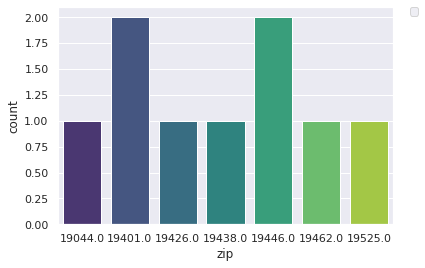

In [128]:
sns.countplot(x = 'zip', data = df.head(11), palette='viridis')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
#our histogram doesn't reflect the proper zip codes which had the most 911 calls.
#This reflects the first few zip codes in the dataset and the count of them.

In [115]:
#2.Whats the most common call reason?
df['title'].value_counts().head(1)

Traffic: VEHICLE ACCIDENT -    23066
Name: title, dtype: int64

In [116]:
#3.Which town had the least amount of 911 calls?
df['twp'].value_counts().tail(1)

LEHIGH COUNTY    30
Name: twp, dtype: int64

In [121]:
#3b.What were the top 4 towns with the most amount of calls?
pd.value_counts(df['twp']).iloc[:4]

LOWER MERION    8443
ABINGTON        5977
NORRISTOWN      5890
UPPER MERION    5227
Name: twp, dtype: int64

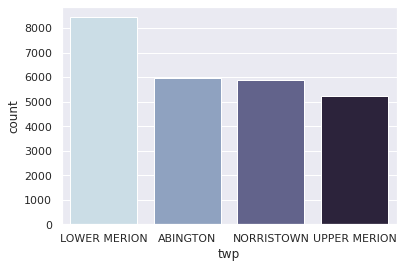

In [117]:
#Plot based on towns and how many calls were reported on each town
sns.countplot(x='twp', data=df,palette='ch:s=.25,rot=-.25', order=df.twp.value_counts().iloc[:4].index)

In [131]:
#4.What was the most recent 911 call?
df['timeStamp'].max()
print('Our data shows that the most recent call was on '+ str(df['timeStamp'].max()))

Our data shows that the most recent call was on 2016-08-24 11:17:02


In [119]:
#5.How many 911 calls per year?
df['timeStamp'] = pd.to_datetime(df['timeStamp'], format='%Y-%m-%d %H:%M:%S')
time = df['timeStamp'].iloc[0]
time.year

2015

In [ ]:
df['Year'] = df['timeStamp'].apply(lambda x: x.year)
df.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Year
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1,2015
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1,2015
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 17:40:00,NORRISTOWN,HAWS AVE,1,2015
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 17:40:01,NORRISTOWN,AIRY ST & SWEDE ST,1,2015
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 17:40:01,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1,2015


In [ ]:
df.groupby('Year').count()['twp']

Year
2015     7963
2016    91486
Name: twp, dtype: int64

In [ ]:
#what are the top 5 zipcodes for 911 calls
df['zip'].value_counts().head()

In [ ]:
#what are the top 5 townships for 911 calls?
df['twp'].value_counts().head(5)

In [ ]:
#how many unique title codes are there
df['title'].nunique()

In [ ]:
#how many unique title codes are there
df['title'].nunique()

110

In [ ]:
df['title'].value_counts()

Traffic: VEHICLE ACCIDENT -    23066
Traffic: DISABLED VEHICLE -     7702
Fire: FIRE ALARM                5496
EMS: RESPIRATORY EMERGENCY      5112
EMS: CARDIAC EMERGENCY          5012
                               ...  
Fire: UNCONSCIOUS SUBJECT          1
Fire: DIABETIC EMERGENCY           1
Fire: SYNCOPAL EPISODE             1
Fire: PLANE CRASH                  1
EMS: BOMB DEVICE FOUND             1
Name: title, Length: 110, dtype: int64

CREATING NEW FEATURES

In [ ]:
df['Reason'] = df['title'].apply(lambda title: title.split(':')[0]) 
#the ':' tells the function to split once it reaches that character
#the 0 position index returns EMS in a new column(also brings fire and traffic)
#also creates another column 'Reason'

In [ ]:
#whats the most common reason for 911 call based off this new column
df['Reason'].value_counts()

EMS        48877
Traffic    35695
Fire       14920
Name: Reason, dtype: int64

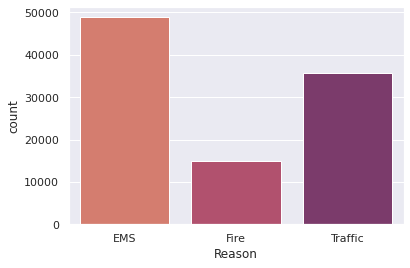

In [ ]:
sns.countplot(x='Reason',data=df,palette="flare")

In [ ]:
#You can now grab specific attributes from a Datetime object by calling them. For example:
time = df['timeStamp'].iloc[0]
time.hour

17

In [ ]:
type(df['timeStamp'])

pandas.core.series.Series

You can use Jupyter's tab method to explore the various attributes you can call. Now that the timestamp column are actually DateTime objects, use .apply() to create 3 new columns called Hour, Month, and Day of Week. You will create these columns based off of the timeStamp column, reference the solutions if you get stuck on this step.

In [ ]:
df['Hour'] = df['timeStamp'].apply(lambda x: x.hour)
df['Month'] = df['timeStamp'].apply(lambda x: x.month)
df['Day of Week'] = df['timeStamp'].apply(lambda x: x.dayofweek)

df.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Year,Reason,Hour,Month,Day of Week
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1,2015,EMS,17,12,3
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1,2015,EMS,17,12,3
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 17:40:00,NORRISTOWN,HAWS AVE,1,2015,Fire,17,12,3
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 17:40:01,NORRISTOWN,AIRY ST & SWEDE ST,1,2015,EMS,17,12,3
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 17:40:01,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1,2015,EMS,17,12,3


Notice how the Day of Week is an integer 0-6. Use the .map() with this dictionary to map the actual string names to the day of the week:

In [ ]:
dmap = {0:'Mon',1:'Tue',2:'Wed',3:'Thu',4:'Fri',5:'Sat',6:'Sun'}

In [ ]:
dmap = {0:'Mon',1:'Tue',2:'Wed',3:'Thu',4:'Fri',5:'Sat',6:'Sun'}

In [ ]:
df['Day of Week'] = df['Day of Week'].apply(lambda x: dmap[x])

df.head()

Now use seaborn to create a countplot of the Day of Week column with the hue based off of the Reason column.

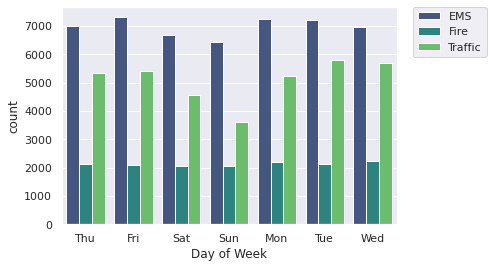

In [ ]:
sns.countplot(x = 'Day of Week', data = df, palette='viridis', hue = 'Reason')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

Now do the same for Month:

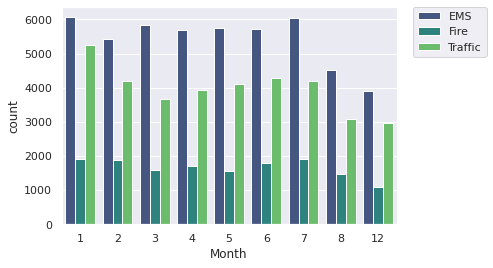

In [ ]:
sns.countplot(x = 'Month', data = df, palette='viridis', hue = 'Reason')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

You should have noticed it was missing some Months, let's see if we can maybe fill in this information by plotting the information in another way, possibly a simple line plot that fills in the missing months, in order to do this, we'll need to do some work with pandas...

Now create a groupby object called byMonth, where you group the DataFrame by the month column and use the count() method for aggregation. Use the head() method on this returned DataFrame.

In [ ]:
byMonth = df.groupby('Month').count()

byMonth.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Year,Reason,Hour,Day of Week
Month,,,,,,,,,,,,,
1,13205,13205,13205,11527,13205,13205,13203,13096,13205,13205,13205,13205,13205
2,11467,11467,11467,9930,11467,11467,11465,11396,11467,11467,11467,11467,11467
3,11101,11101,11101,9755,11101,11101,11092,11059,11101,11101,11101,11101,11101
4,11326,11326,11326,9895,11326,11326,11323,11283,11326,11326,11326,11326,11326
5,11423,11423,11423,9946,11423,11423,11420,11378,11423,11423,11423,11423,11423


Now create a simple plot off of the dataframe indicating the count of calls per month.

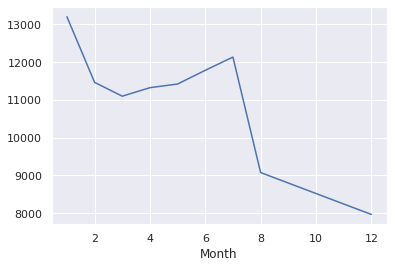

In [ ]:
byMonth['lat'].plot()

Now see if you can use seaborn's lmplot() to create a linear fit on the number of calls per month. Keep in mind you may need to reset the index to a column.

In [ ]:
byMonth = byMonth.reset_index()
byMonth.head()

,index,Month,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Year,Reason,Hour,Day of Week
0,0,1,13205,13205,13205,11527,13205,13205,13203,13096,13205,13205,13205,13205,13205
1,1,2,11467,11467,11467,9930,11467,11467,11465,11396,11467,11467,11467,11467,11467
2,2,3,11101,11101,11101,9755,11101,11101,11092,11059,11101,11101,11101,11101,11101
3,3,4,11326,11326,11326,9895,11326,11326,11323,11283,11326,11326,11326,11326,11326
4,4,5,11423,11423,11423,9946,11423,11423,11420,11378,11423,11423,11423,11423,11423


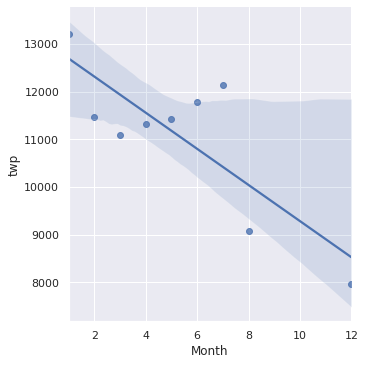

In [ ]:
sns.lmplot(x = 'Month', y = 'twp', data = byMonth)

Create a new column called 'Date' that contains the date from the timeStamp column. You'll need to use apply along with the .date() method.

In [ ]:
df['Date'] = df['timeStamp'].apply(lambda x: x.date())

Now groupby this Date column with the count() aggregate and create a plot of counts of 911 calls.

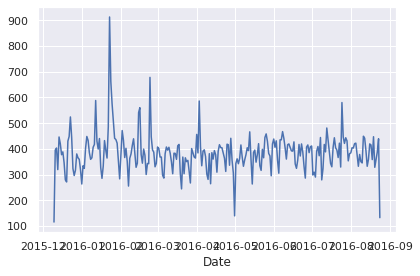

In [ ]:
df.groupby('Date').count()['twp'].plot()
plt.tight_layout()

Now recreate this plot but create 3 separate plots with each plot representing a Reason for the 911 call

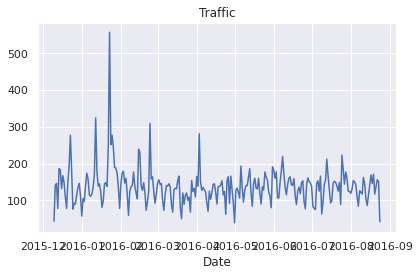

In [ ]:
df_traffic = df[df['Reason'] == 'Traffic']
df_traffic.groupby('Date').count()['twp'].plot()
plt.title('Traffic')
plt.tight_layout()

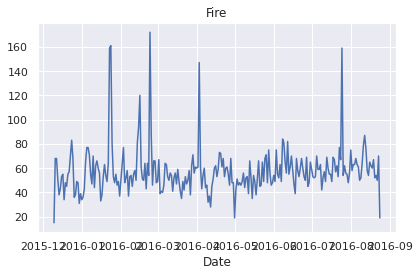

In [ ]:
df_traffic = df[df['Reason'] == 'Fire']
df_traffic.groupby('Date').count()['twp'].plot()
plt.title('Fire')
plt.tight_layout()

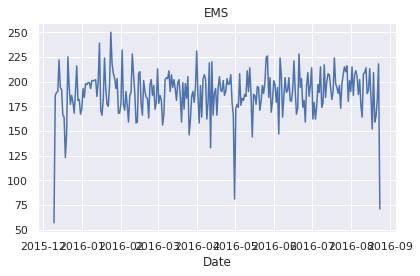

In [ ]:
df_traffic = df[df['Reason'] == 'EMS']
df_traffic.groupby('Date').count()['twp'].plot()
plt.title('EMS')
plt.tight_layout()

Now let's move on to creating heatmaps with seaborn and our data. We'll first need to restructure the dataframe so that the columns become the Hours and the Index becomes the Day of the Week. There are lots of ways to do this, but I would recommend trying to combine groupby with an unstack method. Reference the solutions if you get stuck on this!

In [ ]:
dayHour = df.groupby(['Day of Week','Hour']).count().unstack()['Reason']
dayHour.head()

Hour,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23
Day of Week,,,,,,,,,,,,,,,,,,,,,,,,
Fri,275,235,191,175,201,194,372,598,742,752,803,859,885,890,932,980,1039,980,820,696,667,559,514,474
Mon,282,221,201,194,204,267,397,653,819,786,793,822,893,842,869,913,989,997,885,746,613,497,472,325
Sat,375,301,263,260,224,231,257,391,459,640,697,769,801,831,789,796,848,757,778,696,628,572,506,467
Sun,383,306,286,268,242,240,300,402,483,620,643,693,771,679,684,691,663,714,670,655,537,461,415,330
Thu,278,202,233,159,182,203,362,570,777,828,837,773,889,936,876,969,935,1013,810,698,617,553,424,354


Now create a HeatMap using this new DataFrame.

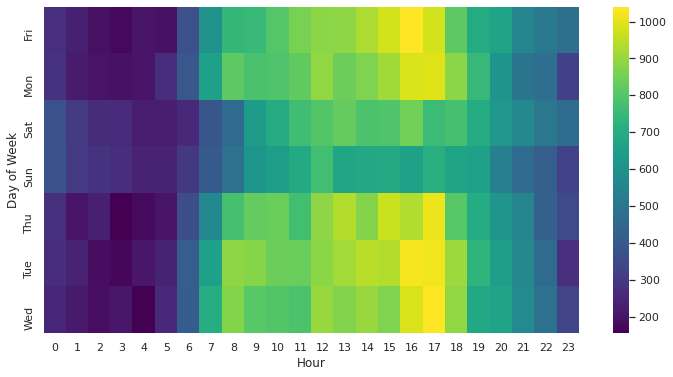

In [ ]:
plt.figure(figsize=(12,6))
sns.heatmap(dayHour,cmap='viridis')

Now create a clustermap using this DataFrame.

<Figure size 864x432 with 0 Axes>

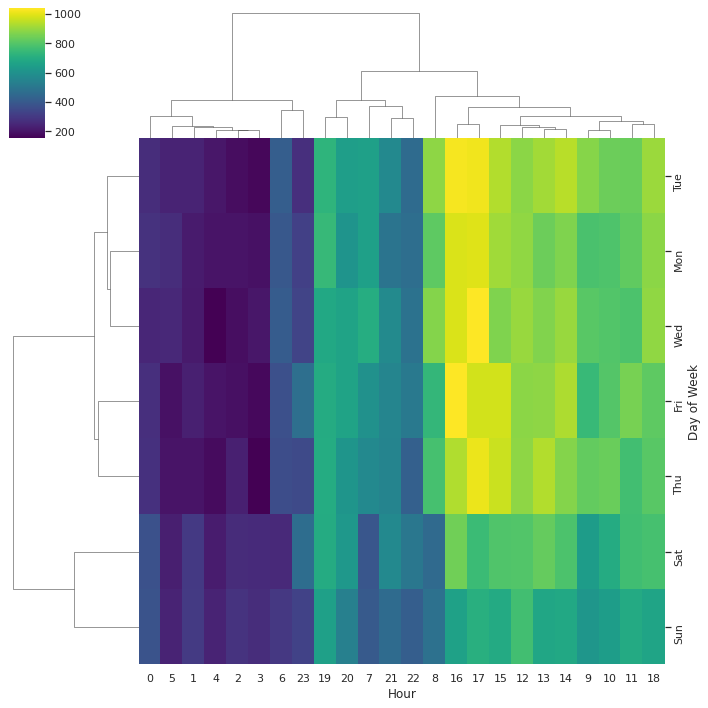

In [ ]:
plt.figure(figsize=(12,6))
sns.clustermap(dayHour, cmap='viridis')

Now repeat these same plots and operations, for a DataFrame that shows the Month as the column.

In [ ]:
dayMonth = df.groupby(['Day of Week','Month']).count().unstack()['Reason']
dayMonth.head()

Month,1,2,3,4,5,6,7,8,12
Day of Week,,,,,,,,,
Fri,1970,1581,1525,1958,1730,1649,2045,1310,1065
Mon,1727,1964,1535,1598,1779,1617,1692,1511,1257
Sat,2291,1441,1266,1734,1444,1388,1695,1099,978
Sun,1960,1229,1102,1488,1424,1333,1672,1021,907
Thu,1584,1596,1900,1601,1590,2065,1646,1230,1266


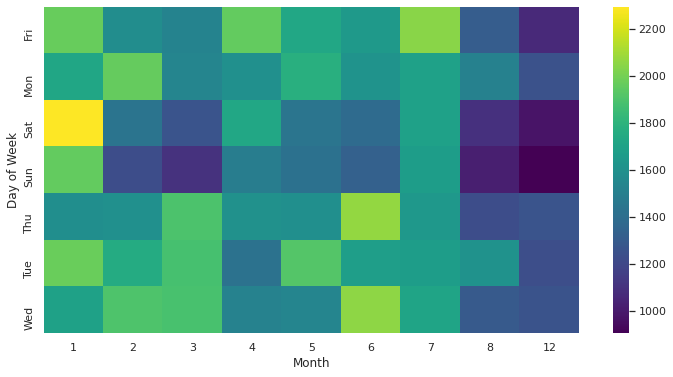

In [ ]:
plt.figure(figsize=(12,6))
sns.heatmap(dayMonth,cmap='viridis')